## Experiment 11
### Assuming a set of data that need to be classified, use a Support Vector Machineclassifier to perform this task and evaluate the accuracy.

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVM classifier
svm = SVC(kernel='linear')  # You can experiment with different kernels (linear, rbf, poly)
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

print("Support Vectors:")
print(svm.support_vectors_)

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix (SVM):")
print(cm)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("\n Classifier Accuracy:", accuracy*100,'%')

Support Vectors:
[[ 0.  0.  0. ...  9.  0.  0.]
 [ 0.  0.  9. ...  1.  0.  0.]
 [ 0.  0.  3. ...  5.  0.  0.]
 ...
 [ 0.  0.  2. ... 14. 10.  1.]
 [ 0.  0.  0. ...  7.  0.  0.]
 [ 0.  0.  7. ...  9.  0.  0.]]

Confusion Matrix (SVM):
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  0  1]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  1  0  0  1  0 37]]

 Classifier Accuracy: 97.77777777777777 %


# Following Cells are not Required for Lab Experiment

## Manually Calculating Confusion Matrix

In [ ]:
import numpy as np


num_classes = np.max(y_test) + 1
cm = np.zeros((num_classes, num_classes), dtype=int)

for true_label, pred_label in zip(y_test, y_pred):
    cm[true_label, pred_label] += 1

print("Manually Calculated Confusion Matrix (SVM):")
print(cm)


Manually Calculated Confusion Matrix (SVM):
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  0  1]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  1  0  0  1  0 37]]


## Printing the Confusion Matrix as a Heatmap

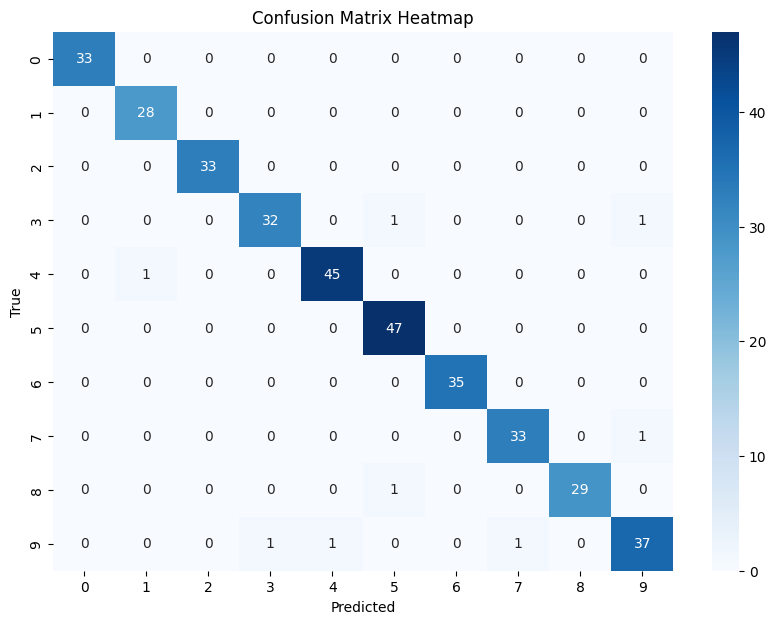

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()


## Plotting Some Test Images with Predictions

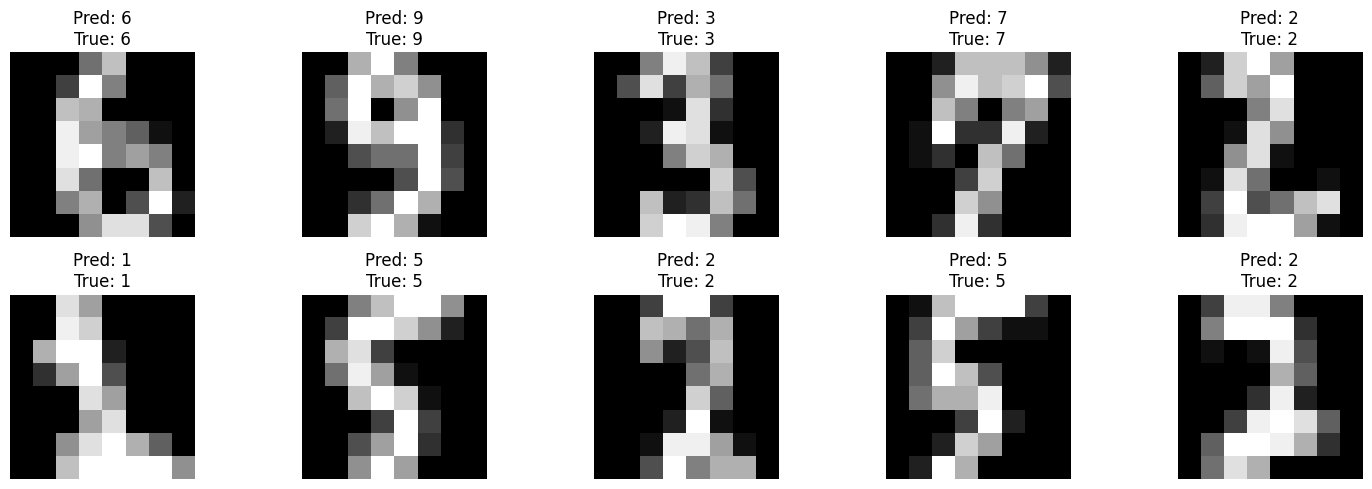

In [ ]:
# Plotting some test images with their predicted and true labels
n_images = 10
plt.figure(figsize=(15, 5))

for i in range(n_images):
    plt.subplot(2, n_images//2, i + 1)
    plt.imshow(X_test[i].reshape(8, 8), cmap='gray')
    plt.title(f'Pred: {y_pred[i]}\nTrue: {y_test[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()


## Printing Detailed Classification Report

In [ ]:
from sklearn.metrics import classification_report

# Print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.94      0.96        34
           4       0.98      0.98      0.98        46
           5       0.96      1.00      0.98        47
           6       1.00      1.00      1.00        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.93      0.94        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



## Plotting Decision Boundaries (2D visualization)

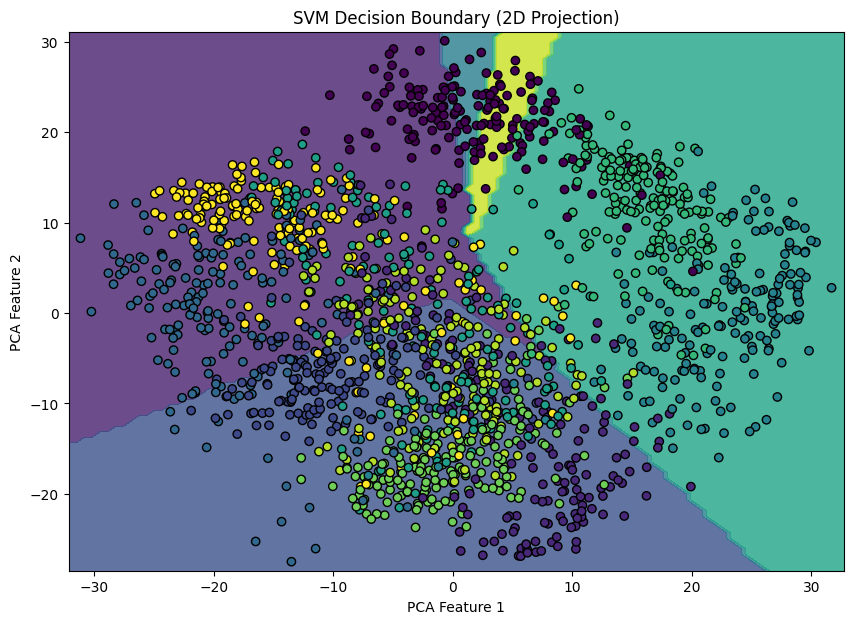

In [ ]:
from sklearn.decomposition import PCA

# Reduce the dimensions to 2D using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Train SVM on the reduced dataset
svm_reduced = SVC(kernel='linear')
svm_reduced.fit(X_reduced[:len(y_train)], y_train)

# Create a mesh grid for plotting
xx, yy = np.meshgrid(np.linspace(X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1, 100),
                     np.linspace(X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1, 100))

# Predict on the mesh grid
Z = svm_reduced.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the decision boundary
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, edgecolors='k', marker='o')
plt.title('SVM Decision Boundary (2D Projection)')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()
